<a href="https://colab.research.google.com/github/MateusSanfer/Desafio-de-codigo-AluraStore-Br/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [160]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [161]:
print('Análise do faturamento: ')
faturamento ={
    "Loja 01": loja["Preço"].sum(),
    "Loja 02": loja2["Preço"].sum(),
    "Loja 03": loja3["Preço"].sum(),
    "Loja 04": loja4["Preço"].sum(),
}
for nome_lojas, valor in faturamento.items():
    print(f'{nome_lojas}: R${valor:,.2f}')

Análise do faturamento: 
Loja 01: R$1,534,509.12
Loja 02: R$1,488,459.06
Loja 03: R$1,464,025.03
Loja 04: R$1,384,497.58


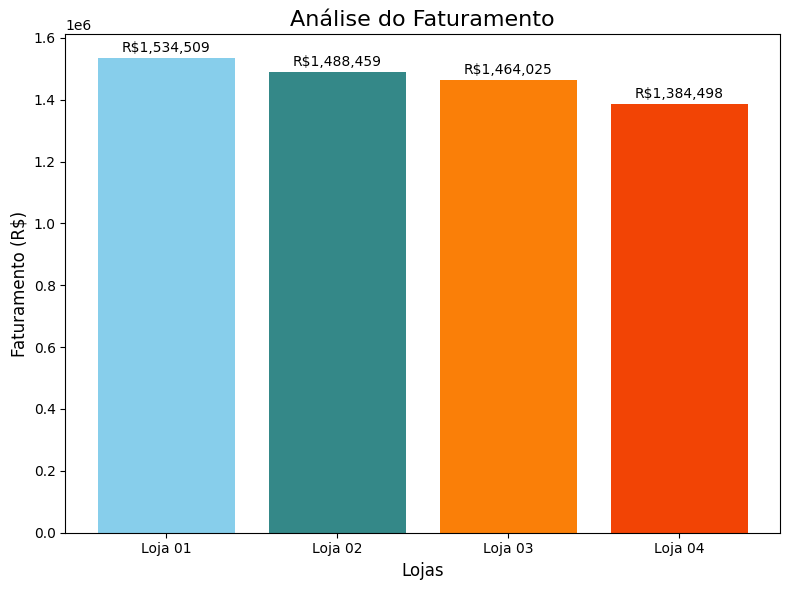

In [162]:
# Dados
lojas = list(faturamento.keys())   # ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04']
valores = list(faturamento.values()) # [1534509.12, 1488459.06, 1464025.03, 1384497.58]

# Criando o gráfico
plt.figure(figsize=(8,6))  # Define o tamanho da figura
plt.bar(lojas, valores, color=['skyblue', '#348888', '#FA7F08', '#F24405'])  # Gráfico de barras

# Adicionando título e rótulos
plt.title("Análise do Faturamento", fontsize=16)
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# Mostrar os valores acima das barras (opcional, mas deixa mais bonito)
for i, valor in enumerate(valores):
    plt.text(i, valor + 10000, f'R${valor:,.0f}', ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [163]:
print('Vendas por categoria: ')
venda_por_categoria = {
    "Loja 01": loja["Categoria do Produto"].value_counts(),
    "Loja 02": loja2["Categoria do Produto"].value_counts(),
    "Loja 03": loja3["Categoria do Produto"].value_counts(),
    "Loja 04": loja4["Categoria do Produto"].value_counts(),
}

for lojas, categorias in venda_por_categoria.items():
    print(f"Loja: {lojas}")
    print(categorias)
    print()


Vendas por categoria: 
Loja: Loja 01
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja: Loja 02
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja: Loja 03
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja: Loja 04
Categoria do Produto
moveis                   480
eletronicos              451
br

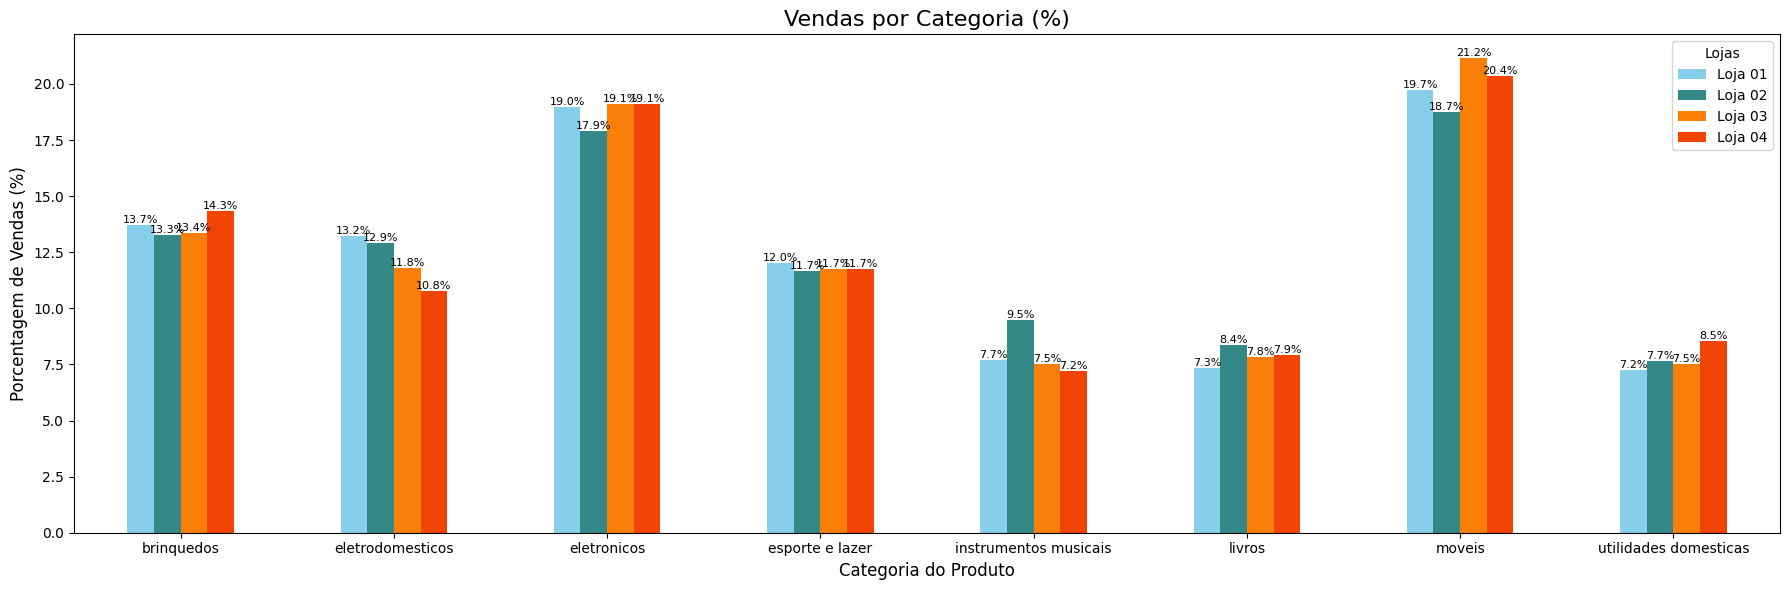

In [164]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 01", "Loja 02", "Loja 03", "Loja 04"]

vendas_de_categorias = {
    nome: dados["Categoria do Produto"].value_counts()
    for nome, dados in zip(nomes_lojas, lojas)
}

df = pd.DataFrame(vendas_de_categorias).fillna(0)
df_percentual = df.apply(lambda col: (col / col.sum()) * 100)

fig, ax = plt.subplots(figsize=(18, 6))
df_percentual.plot(kind='bar', ax=ax, color=['skyblue', '#348888', '#FA7F08', '#F24405'])

plt.title("Vendas por Categoria (%)", fontsize=16)
plt.ylabel("Porcentagem de Vendas (%)" ,fontsize=12)
plt.xlabel("Categoria do Produto" ,fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Lojas")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [165]:
print('Média de Avaliação das Lojas: ')
media_avaliacao_loja = {
    "Loja 01": loja["Avaliação da compra"].mean(),
    "Loja 02": loja2["Avaliação da compra"].mean(),
    "Loja 03": loja3["Avaliação da compra"].mean(),
    "Loja 04": loja4["Avaliação da compra"].mean(),
}

for lojas, media_nota in media_avaliacao_loja.items():
  print(f'{lojas}:  {media_nota:.2f}')


Média de Avaliação das Lojas: 
Loja 01:  3.98
Loja 02:  4.04
Loja 03:  4.05
Loja 04:  4.00


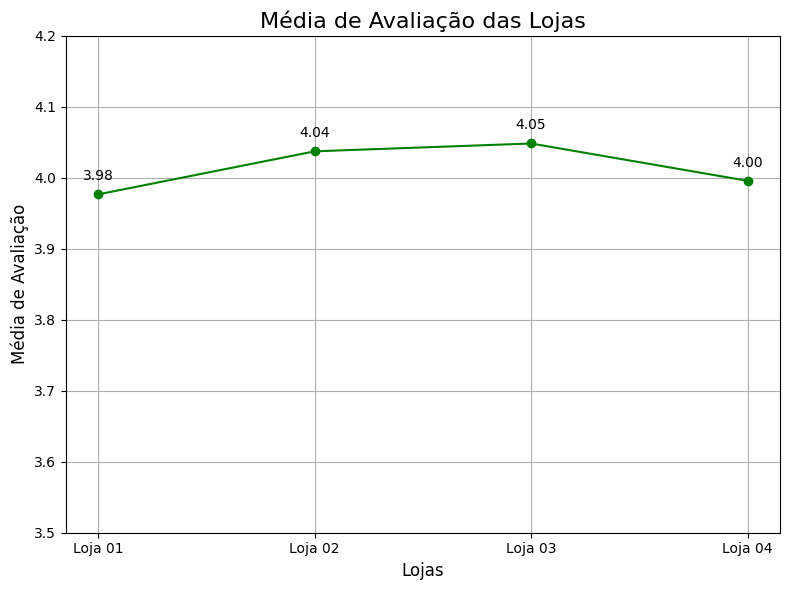

In [166]:
# Usando os valores do dicionário
lojas = list(media_avaliacao_loja.keys())        # Puxa os nomes das lojas
medias = list(media_avaliacao_loja.values())      # Puxa as médias calculadas


plt.figure(figsize=(8,6))
plt.plot(lojas, medias, marker='o', color='green', linestyle='-')

plt.title('Média de Avaliação das Lojas', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.ylim(3.5, 4.2)

# Anotar o valor em cima de cada ponto
for i, media in enumerate(medias):
    plt.text(lojas[i], media + 0.02, f'{media:.2f}', ha='center', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [167]:
print('Produtos Mais e Menos Vendidos: ')
produtos_vendidos = {
    "Loja 01": loja["Produto"].value_counts(),
    "Loja 02": loja2["Produto"].value_counts(),
    "Loja 03": loja3["Produto"].value_counts(),
    "Loja 04": loja4["Produto"].value_counts(),
}

for loja_nome, produtos in produtos_vendidos.items():
  produto_mais_vendido = produtos.idxmax()
  quantidade_mais_vendido = produtos.max()

  produto_menos_vendido = produtos.idxmin()
  quantidade_menos_vendido = produtos.min()

  print(f"\n{loja_nome}:")
  print(f"Produto mais vendido: {produto_mais_vendido} (Vendas: {quantidade_mais_vendido})")
  print(f"Produto menos vendido: {produto_menos_vendido} (Vendas: {quantidade_menos_vendido})")

Produtos Mais e Menos Vendidos: 

Loja 01:
Produto mais vendido: Micro-ondas (Vendas: 60)
Produto menos vendido: Headset (Vendas: 33)

Loja 02:
Produto mais vendido: Iniciando em programação (Vendas: 65)
Produto menos vendido: Jogo de tabuleiro (Vendas: 32)

Loja 03:
Produto mais vendido: Kit banquetas (Vendas: 57)
Produto menos vendido: Blocos de montar (Vendas: 35)

Loja 04:
Produto mais vendido: Cama box (Vendas: 62)
Produto menos vendido: Guitarra (Vendas: 33)


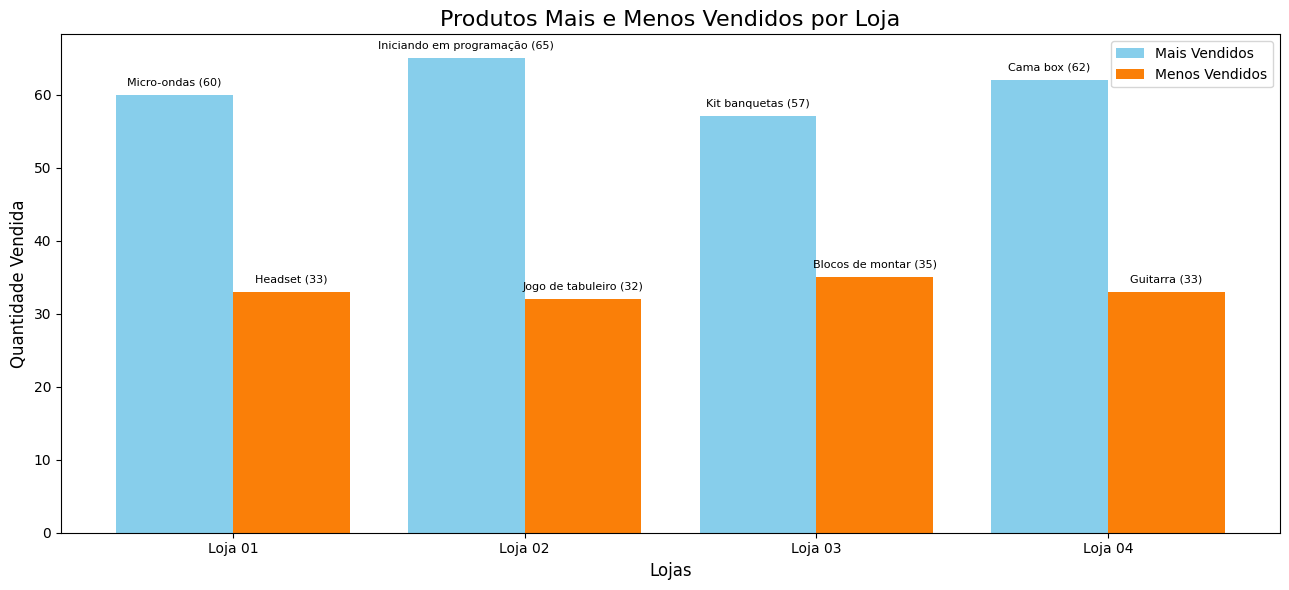

In [168]:
import numpy as np

# Dados organizados
lojas = ["Loja 01", "Loja 02", "Loja 03", "Loja 04"]
produtos_mais_vendidos = ["Micro-ondas", "Iniciando em programação", "Kit banquetas", "Cama box"]
qtd_mais_vendidos = [60, 65, 57, 62]

produtos_menos_vendidos = ["Headset", "Jogo de tabuleiro", "Blocos de montar", "Guitarra"]
qtd_menos_vendidos = [33, 32, 35, 33]

# Configurar posições no eixo x
x = np.arange(len(lojas))  # Posições para cada loja
largura_barra = 0.4  # Largura das barras

# Criar o gráfico
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(x - largura_barra/2, qtd_mais_vendidos, width=largura_barra, color='skyblue', label='Mais Vendidos')
ax.bar(x + largura_barra/2, qtd_menos_vendidos, width=largura_barra, color='#FA7F08', label='Menos Vendidos')

# Configurar título, rótulos e legenda
ax.set_title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
ax.set_xlabel('Lojas', fontsize=12)
ax.set_ylabel('Quantidade Vendida', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(lojas)

# Exibir os valores sobre as barras
for i in range(len(lojas)):
    ax.text(x[i] - largura_barra/2, qtd_mais_vendidos[i] + 1, f'{produtos_mais_vendidos[i]} ({qtd_mais_vendidos[i]})',
            ha='center', va='bottom', fontsize=8)
    ax.text(x[i] + largura_barra/2, qtd_menos_vendidos[i] + 1, f'{produtos_menos_vendidos[i]} ({qtd_menos_vendidos[i]})',
            ha='center', va='bottom', fontsize=8)

# Exibir legenda e ajustar layout
ax.legend()
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [169]:
print('Frete Médio por Loja: ')
frete_medio= {
    "Loja 01": loja["Frete"].mean(),
    "Loja 02": loja2["Frete"].mean(),
    "Loja 03": loja3["Frete"].mean(),
    "Loja 04": loja4["Frete"].mean(),
}

for nome_lojas, valor_frete in frete_medio.items():
  print(f"{nome_lojas}: R${valor_frete:,.2f}")

Frete Médio por Loja: 
Loja 01: R$34.69
Loja 02: R$33.62
Loja 03: R$33.07
Loja 04: R$31.28


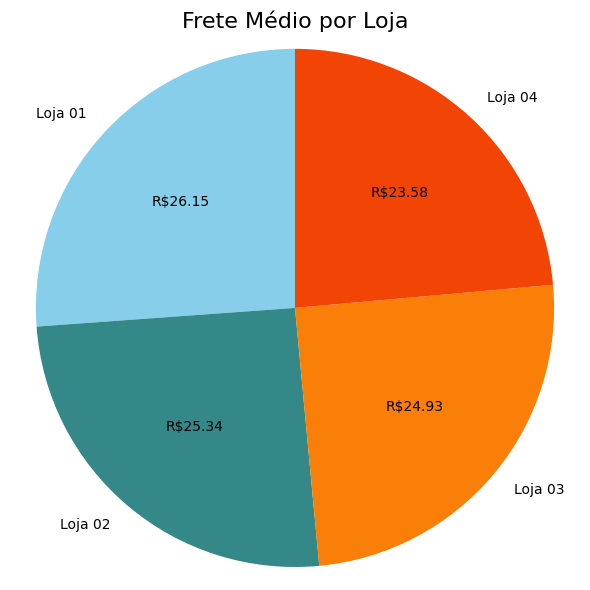

In [170]:
# Separar as variáveis
labels = list(frete_medio.keys())
valores = list(frete_medio.values())
cores = ['skyblue', '#348888', '#FA7F08', '#F24405']  # cores personalizadas

# Criar o gráfico
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=labels, autopct='R$%.2f', startangle=90, colors=cores)
plt.title('Frete Médio por Loja', fontsize=16)
plt.axis('equal')  # Deixa o gráfico perfeitamente redondo

plt.tight_layout()
plt.show()


### Esse gráfico mostrará os pontos de venda (localizações geográficas).

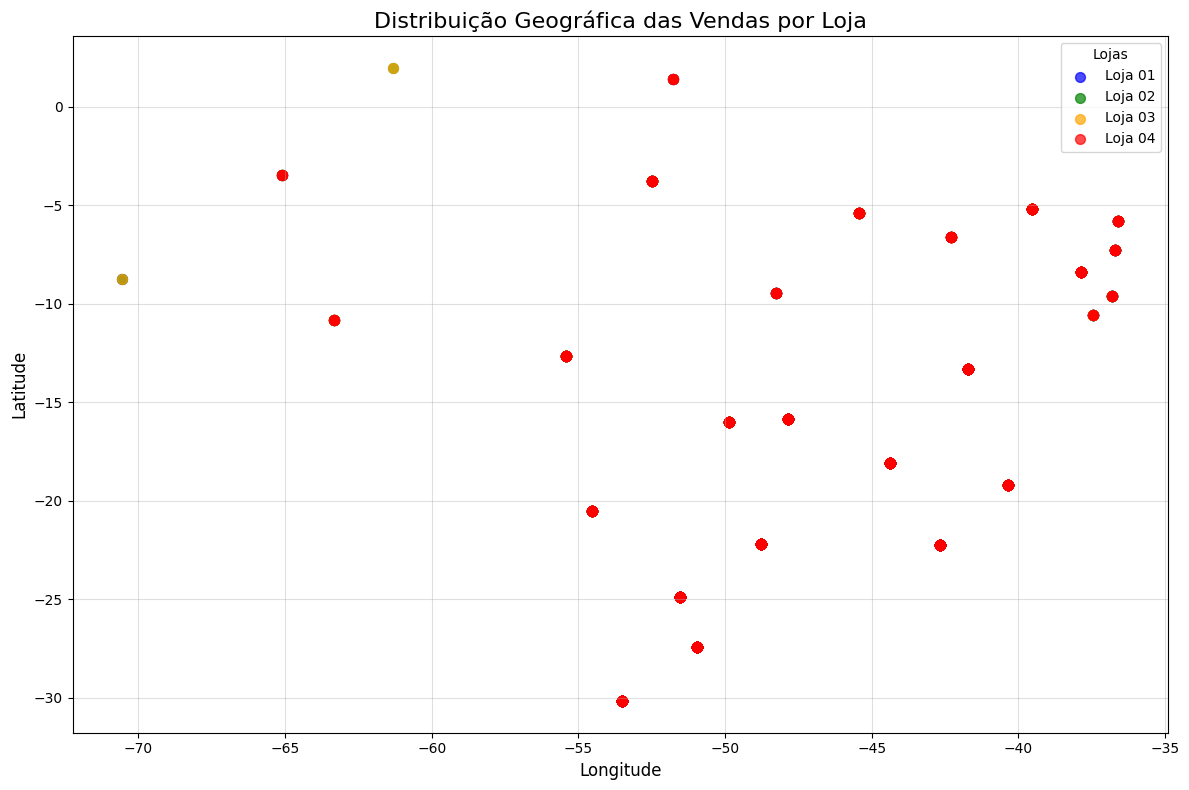

In [171]:

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

plt.scatter(loja["lon"], loja["lat"], label="Loja 01", alpha=0.7, s=50, color="blue")
plt.scatter(loja2["lon"], loja2["lat"], label="Loja 02", alpha=0.7, s=50, color="green")
plt.scatter(loja3["lon"], loja3["lat"], label="Loja 03", alpha=0.7, s=50, color="orange")
plt.scatter(loja4["lon"], loja4["lat"], label="Loja 04", alpha=0.7, s=50, color="red")

# Adicionar título e rótulos
plt.title("Distribuição Geográfica das Vendas por Loja", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Lojas")
plt.grid(alpha=0.4)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Para identificar concentrações de vendas, usando um mapa de calor (heatmap). Ele destaca as áreas com mais atividades de vendas.


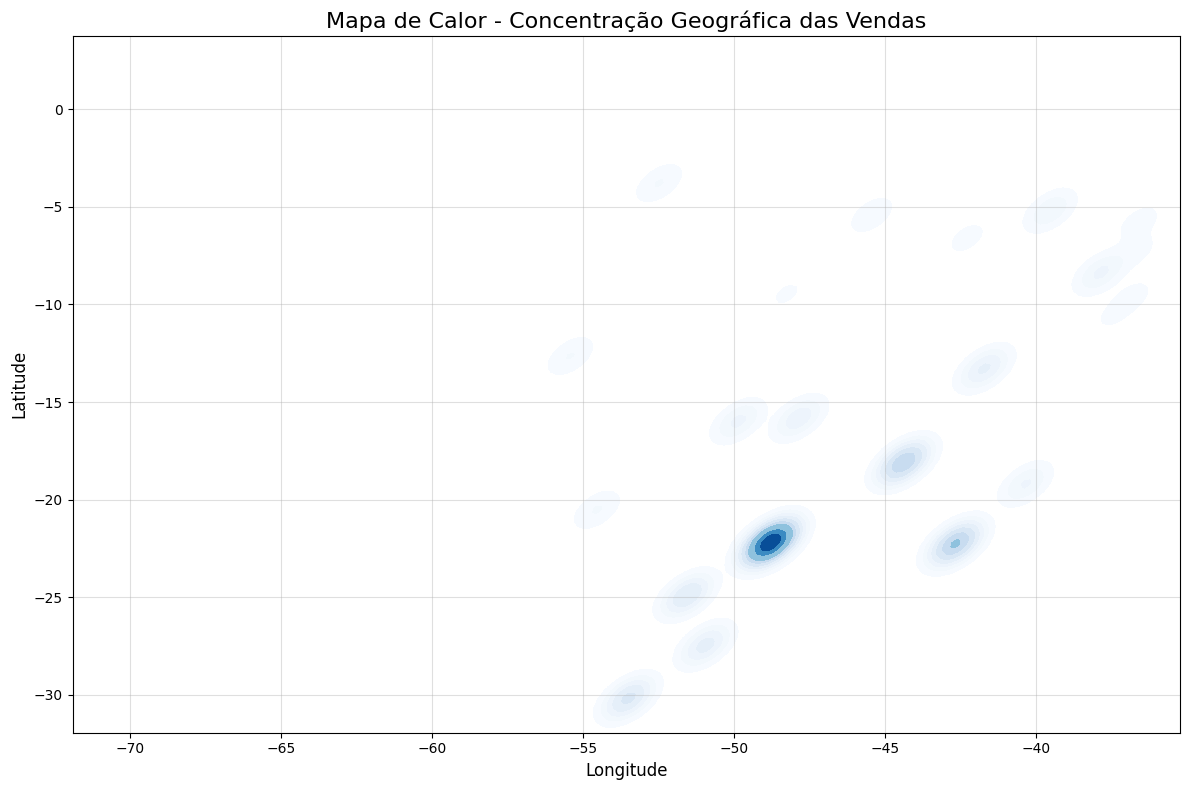

In [172]:
import seaborn as sns

# Combinar os dados de todas as lojas em um único DataFrame
dados_completos = pd.concat([
    loja.assign(loja="Loja 01"),
    loja2.assign(loja="Loja 02"),
    loja3.assign(loja="Loja 03"),
    loja4.assign(loja="Loja 04")
])

# Criar o mapa de calor
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=dados_completos["lon"],
    y=dados_completos["lat"],
    cmap="Blues", fill=True, bw_adjust=0.5
)

plt.title("Mapa de Calor - Concentração Geográfica das Vendas", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

### Mapas de calor separados para cada loja

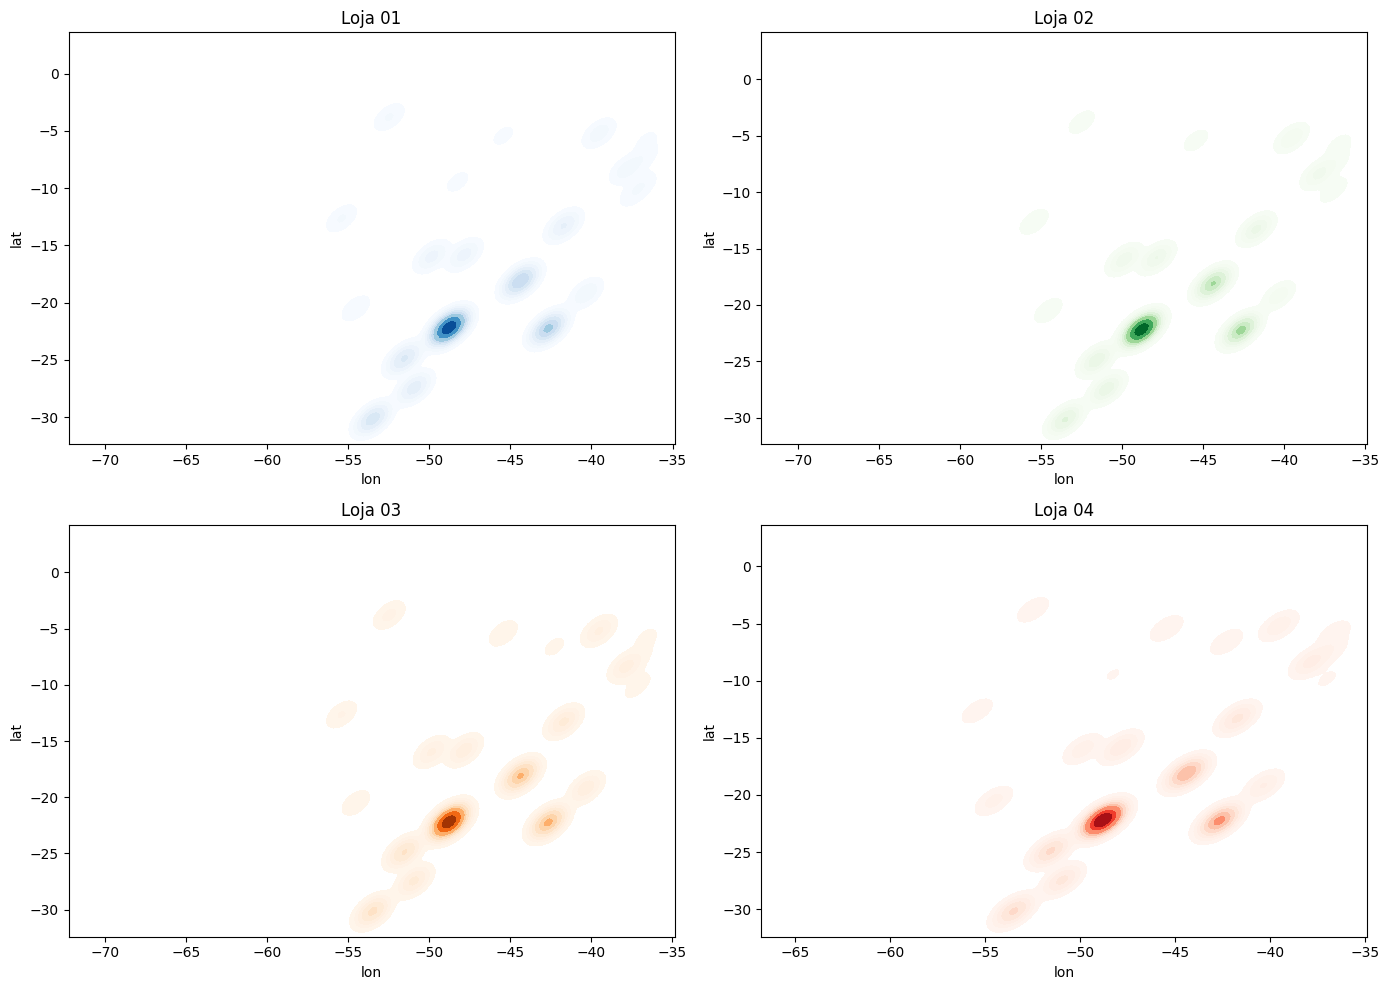

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Criar subplots para 4 lojas

# Loja 01
sns.kdeplot(
    x=loja["lon"], y=loja["lat"], cmap="Blues", fill=True, bw_adjust=0.5, ax=axs[0, 0]
)
axs[0, 0].set_title("Loja 01")

# Loja 02
sns.kdeplot(
    x=loja2["lon"], y=loja2["lat"], cmap="Greens", fill=True, bw_adjust=0.5, ax=axs[0, 1]
)
axs[0, 1].set_title("Loja 02")

# Loja 03
sns.kdeplot(
    x=loja3["lon"], y=loja3["lat"], cmap="Oranges", fill=True, bw_adjust=0.5, ax=axs[1, 0]
)
axs[1, 0].set_title("Loja 03")

# Loja 04
sns.kdeplot(
    x=loja4["lon"], y=loja4["lat"], cmap="Reds", fill=True, bw_adjust=0.5, ax=axs[1, 1]
)
axs[1, 1].set_title("Loja 04")

plt.tight_layout()
plt.show()

# Relatorio

### **Relatório de Análise de Vendas e Desempenho das Lojas - Alura Store**

#### **1. Introdução**

O objetivo deste relatório é fornecer uma análise detalhada sobre o desempenho das lojas da rede Alura Store, ajudando o Senhor João a decidir qual loja deve ser vendida para iniciar um novo empreendimento. A análise baseia-se em métricas de **faturamento**, **avaliação de clientes**, **vendas por categoria**, **produtos mais e menos vendidos** e **frete médio**.

#### **2. Análise de Faturamento**

A primeira métrica analisada foi o **faturamento** total de cada loja. O faturamento é um dos indicadores mais importantes, pois demonstra a capacidade de geração de receita de cada unidade.

- **Loja 01**: R$1.534.509,12
- **Loja 02**: R$1.488.459,06
- **Loja 03**: R$1.464.025,03
- **Loja 04**: R$1.384.497,58

A **Loja 01** apresentou o maior faturamento, enquanto a **Loja 04** ficou com o menor valor, destacando-se como uma loja com **menor desempenho financeiro**.

#### **3. Análise de Vendas por Categoria**

Em relação às **vendas por categoria**, as lojas possuem um desempenho muito semelhante, com destaque para as categorias de **móveis** e **eletrônicos**, que são as mais vendidas em todas as lojas.

- **Loja 01**: 465 unidades de móveis, 448 de eletrônicos.
- **Loja 02**: 442 unidades de móveis, 422 de eletrônicos.
- **Loja 03**: 499 unidades de móveis, 451 de eletrônicos.
- **Loja 04**: 480 unidades de móveis, 451 de eletrônicos.

Embora a diferença não seja grande, a **Loja 04** tem números **ligeiramente menores** em comparação com as demais, indicando um desempenho um pouco mais fraco.

#### **4. Análise das Avaliações**

As **médias de avaliação** também foram analisadas. A avaliação dos clientes reflete diretamente a satisfação com os produtos e serviços de cada loja:

- **Loja 01**: 3,98
- **Loja 02**: 4,04
- **Loja 03**: 4,05
- **Loja 04**: 4,00

A **Loja 03** obteve a maior média de avaliação, destacando-se em termos de **satisfação do cliente**. A **Loja 01** teve a menor média, mas a diferença não é tão significativa.

#### **5. Produtos Mais e Menos Vendidos**

A análise de **produtos mais e menos vendidos** mostra os seguintes resultados:

- **Loja 01**: Produto mais vendido: Micro-ondas (60 vendas), produto menos vendido: Headset (33 vendas).
- **Loja 02**: Produto mais vendido: Iniciando em programação (65 vendas), produto menos vendido: Jogo de tabuleiro (32 vendas).
- **Loja 03**: Produto mais vendido: Kit banquetas (57 vendas), produto menos vendido: Blocos de montar (35 vendas).
- **Loja 04**: Produto mais vendido: Cama box (62 vendas), produto menos vendido: Guitarra (33 vendas).

Os produtos mais vendidos variam entre **57 e 65 unidades**, enquanto os menos vendidos estão entre **32 e 35 unidades**. Isso indica que todas as lojas têm um **desempenho equilibrado** no que diz respeito aos produtos populares, mas com pequenas variações.

#### **6. Frete Médio**

O **frete médio** é uma métrica importante para entender o custo logístico das lojas. Os resultados obtidos foram:

- **Loja 01**: R$34,69
- **Loja 02**: R$33,62
- **Loja 03**: R$33,07
- **Loja 04**: R$31,28

A **Loja 04** tem o **menor custo de frete**, o que pode ser um ponto positivo, mas não é suficiente para compensar seu desempenho inferior em outras métricas.

#### **7. Conclusão e Recomendação**

Com base nas análises de **faturamento**, **vendas por categoria**, **avaliações** dos clientes, **produtos mais e menos vendidos** e **frete médio**, concluímos que a **Loja 04** apresenta o **menor desempenho geral** entre as quatro.

Embora o custo de frete da Loja 04 seja o menor, seu **faturamento** e **vendas por categoria** são inferiores às outras lojas. Além disso, a **média de avaliação** dos clientes e os **produtos vendidos** também indicam um desempenho mais fraco.

Portanto, **recomendamos que o Senhor João considere vender a Loja 04**, pois ela se destaca como a opção menos eficiente, com menores resultados financeiros e de desempenho em relação às outras lojas.
